In [16]:
# Import necessary packages
import pandas as pd
import statsmodels.api as sm
import os
import numpy as np

# Define file paths and load data into pandas dataframes
data_folder = '../data' 

cast_details_path = os.path.join(data_folder, 'tv_show_cast_details.csv')
image_race_gender_path = os.path.join(data_folder, 'tv_cast_image_race_gender.csv')
show_to_cast_path = os.path.join(data_folder, 'tv_show_season_to_cast.csv')
processed_gender_path = os.path.join(data_folder, 'tv_show_cast_processed_gender.csv')

df_cast_details = pd.read_csv(cast_details_path)[['id', 'gender']]
df_image_race_gender = pd.read_csv(image_race_gender_path)[['id', 'profile_race', 'profile_gender']]
df_show_cast = pd.read_csv(show_to_cast_path)[['cast_id', 'episode_count']]
df_processed_gender = pd.read_csv(processed_gender_path)[['id', 'gender']]

# Map gender from numerical to categorical in df_cast_details and merge it with df_image_race_gender
gender_map = {1: 'Female', 2: 'Male', 0: 'Other'}
df_cast_details['gender'] = df_cast_details['gender'].map(gender_map)
df = pd.merge(df_cast_details, df_image_race_gender, on='id', how='left')

# Merge with df_show_cast and df_processed_gender
df = pd.merge(df, df_show_cast, left_on='id', right_on='cast_id', how='left')
df = pd.merge(df, df_processed_gender, on='id', how='left', suffixes=('', '_processed'))

# Fill missing episode counts with 0 and drop rows where gender or race is missing
df['episode_count'].fillna(0, inplace=True)
df.dropna(subset=['gender', 'profile_race'], inplace=True)

# Perform OLS regression with episode_count as dependent variable and gender & race as independent variables
for col in ['gender', 'profile_gender', 'gender_processed', 'profile_race']:
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)

Y = df['episode_count']
X = df[df.columns[df.columns.str.contains('gender|profile_race')]]
X = X.select_dtypes(include=[np.number]) # Ensure only numeric columns remain

X = sm.add_constant(X)  # adding a constant

# Perform OLS regression
model = sm.OLS(Y, X).fit()

# Print out the statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          episode_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 24 Jul 2023   Prob (F-statistic):                nan
Time:                        15:45:20   Log-Likelihood:            -1.0533e+06
No. Observations:              191304   AIC:                         2.107e+06
Df Residuals:                  191303   BIC:                         2.107e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9029      0.136     50.697      0.0

In [17]:
import pandas as pd

# Assume df is your DataFrame and it has columns 'gender' and 'profile_race'

# Gender breakdown
gender_counts = df['gender'].value_counts()

# Calculate percentages
gender_percentages = gender_counts / gender_counts.sum() * 100

# Display gender breakdown
print("Gender Breakdown:")
print(gender_percentages)

# For each racial group, calculate and display gender breakdown
racial_groups = df['profile_race'].unique()

for race in racial_groups:
    print("\nGender Breakdown for Race: ", race)
    race_df = df[df['profile_race'] == race]
    race_gender_counts = race_df['gender'].value_counts()
    race_gender_percentages = race_gender_counts / race_gender_counts.sum() * 100
    print(race_gender_percentages)


Gender Breakdown:
gender
Male      61.472839
Female    34.920859
Other      3.606302
Name: count, dtype: float64

Gender Breakdown for Race:  white
gender
Male      59.346266
Female    37.411469
Other      3.242265
Name: count, dtype: float64

Gender Breakdown for Race:  latino hispanic
gender
Male      61.942121
Female    33.522107
Other      4.535772
Name: count, dtype: float64

Gender Breakdown for Race:  middle eastern
gender
Male      90.643761
Female     5.560174
Other      3.796065
Name: count, dtype: float64

Gender Breakdown for Race:  asian
gender
Male      50.947108
Female    44.368352
Other      4.684540
Name: count, dtype: float64

Gender Breakdown for Race:  black
gender
Male      66.392139
Female    29.495626
Other      4.112234
Name: count, dtype: float64

Gender Breakdown for Race:  indian
gender
Male      67.522124
Female    26.017699
Other      6.460177
Name: count, dtype: float64


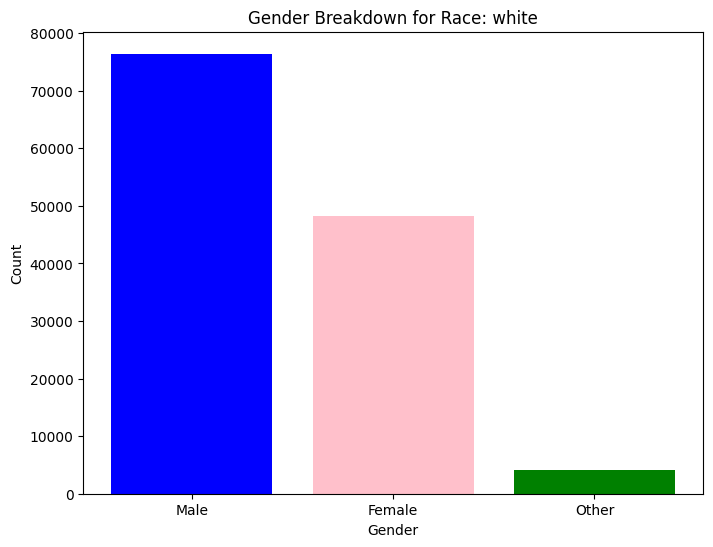

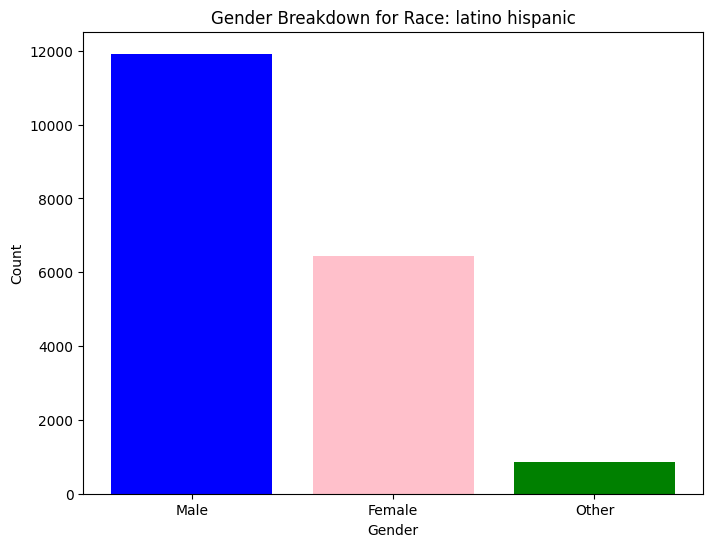

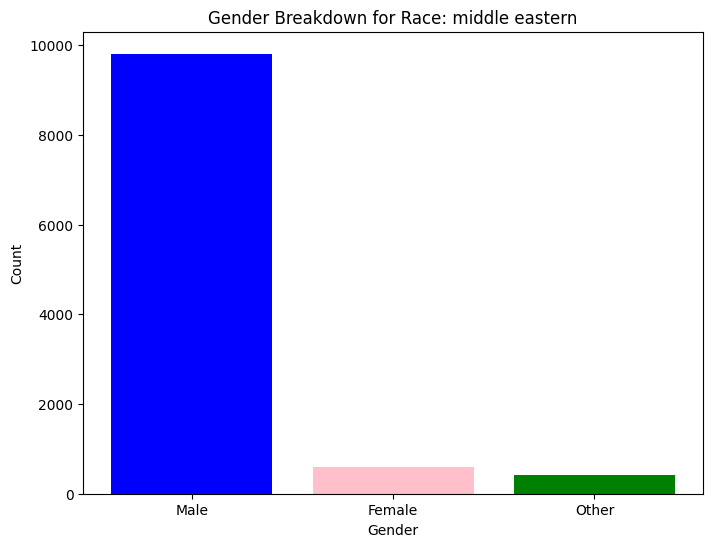

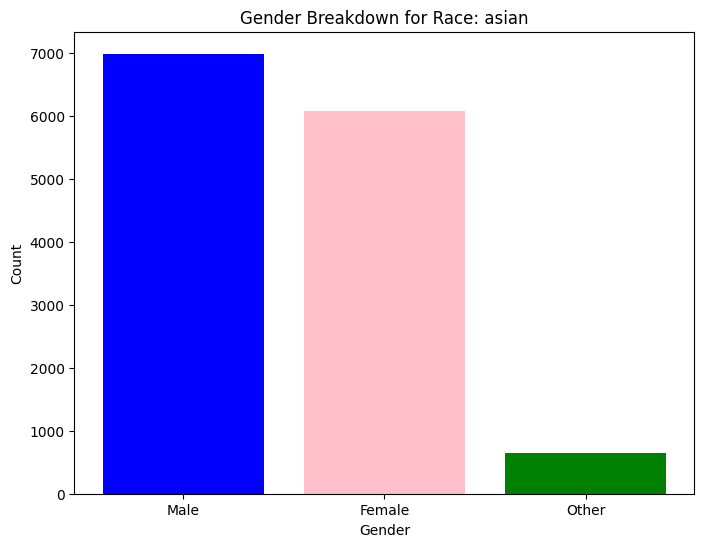

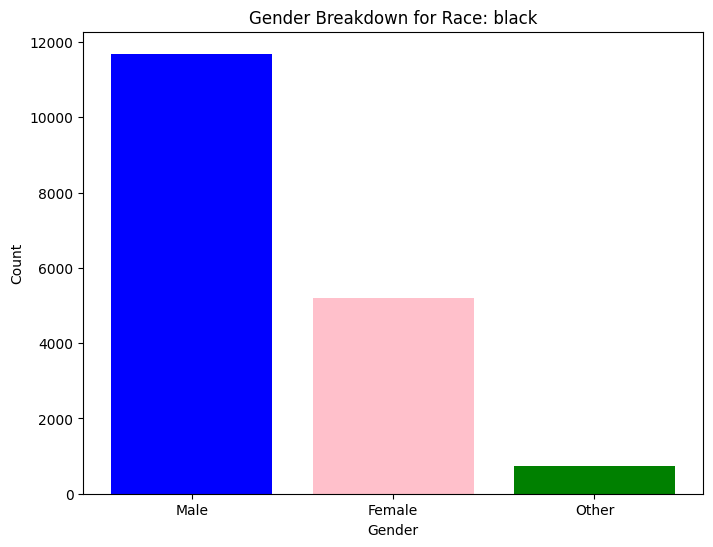

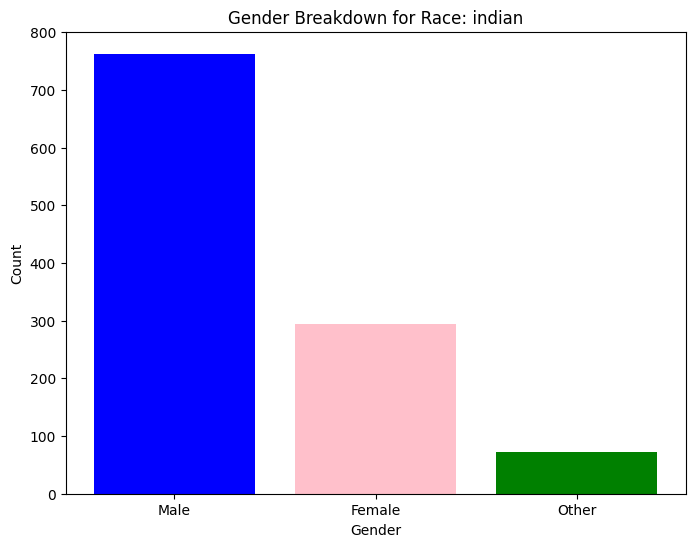

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is your DataFrame and it has columns 'gender' and 'profile_race'

# For each racial group, calculate and display gender breakdown
racial_groups = df['profile_race'].unique()

for race in racial_groups:
    # Select the DataFrame for this race
    race_df = df[df['profile_race'] == race]
    
    # Count the genders
    race_gender_counts = race_df['gender'].value_counts()
    
    # Create a bar plot for this racial group
    plt.figure(figsize=(8, 6))
    plt.bar(race_gender_counts.index, race_gender_counts.values, color=['blue', 'pink', 'green'])
    
    # Add title and labels
    plt.title(f"Gender Breakdown for Race: {race}")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    
    # Show the plot
    plt.show()


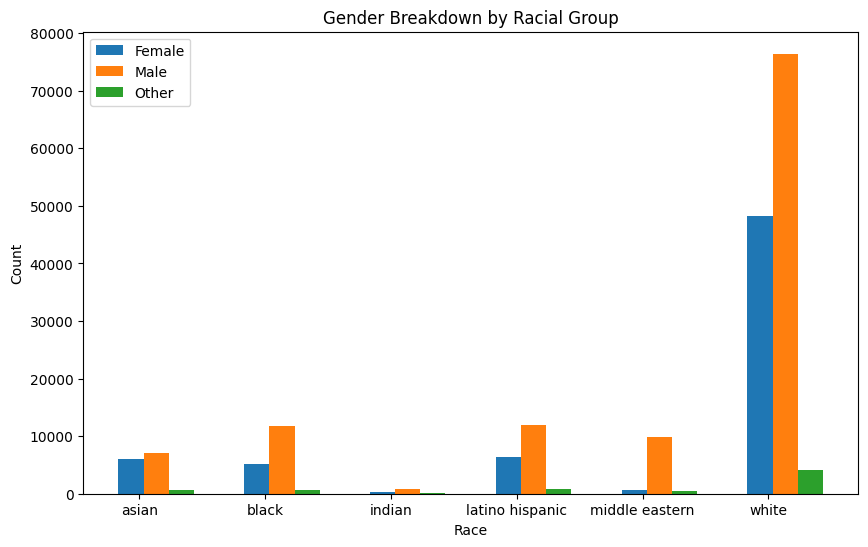

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and it has columns 'gender' and 'profile_race'

# Calculate the gender breakdown by racial group
gender_race_counts = df.groupby('profile_race')['gender'].value_counts().unstack().fillna(0)

# Setup the bar plot
bar_width = 0.20
index = np.arange(len(gender_race_counts.index))

# Create the figure and the axes
fig, ax = plt.subplots(figsize=(10,6))

# Create the bars for each gender
for i, gender in enumerate(gender_race_counts.columns):
    ax.bar(index + i * bar_width, gender_race_counts[gender], bar_width, label=gender)

# Setup the x-axis
ax.set_xlabel('Race')
ax.set_xticks(index + bar_width / len(gender_race_counts.columns))
ax.set_xticklabels(gender_race_counts.index)

# Setup the y-axis
ax.set_ylabel('Count')

# Add a legend and a title
ax.set_title('Gender Breakdown by Racial Group')
ax.legend()

# Show the plot
plt.show()


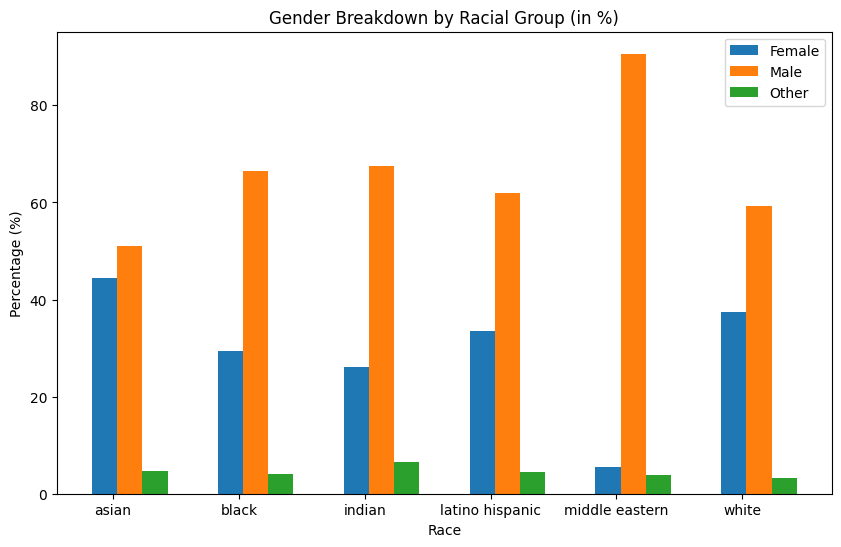

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and it has columns 'gender' and 'profile_race'

# Calculate the gender breakdown by racial group
gender_race_counts = df.groupby('profile_race')['gender'].value_counts().unstack().fillna(0)

# Convert counts to percentages
gender_race_percentages = gender_race_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Setup the bar plot
bar_width = 0.20
index = np.arange(len(gender_race_percentages.index))

# Create the figure and the axes
fig, ax = plt.subplots(figsize=(10,6))

# Create the bars for each gender
for i, gender in enumerate(gender_race_percentages.columns):
    ax.bar(index + i * bar_width, gender_race_percentages[gender], bar_width, label=gender)

# Setup the x-axis
ax.set_xlabel('Race')
ax.set_xticks(index + bar_width / len(gender_race_percentages.columns))
ax.set_xticklabels(gender_race_percentages.index)

# Setup the y-axis
ax.set_ylabel('Percentage (%)')

# Add a legend and a title
ax.set_title('Gender Breakdown by Racial Group (in %)')
ax.legend()

# Show the plot
plt.show()


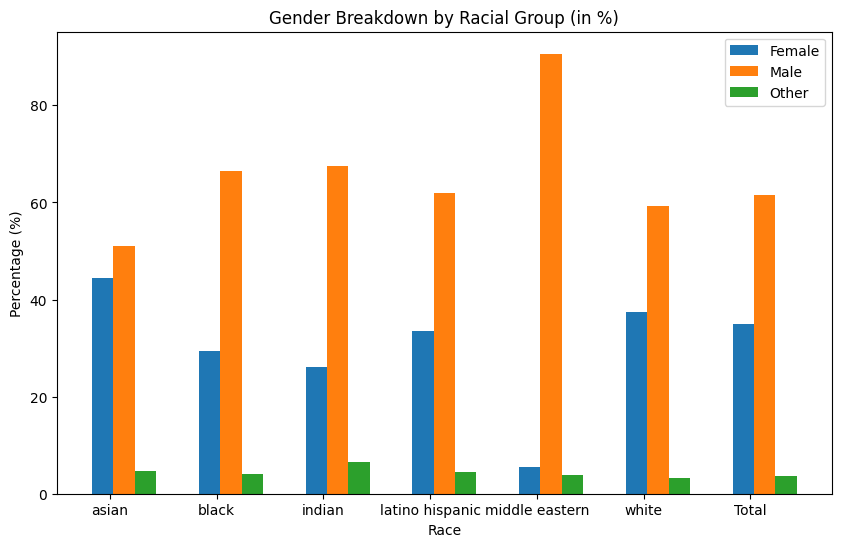

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and it has columns 'gender' and 'profile_race'

# Calculate the gender breakdown by racial group
gender_race_counts = df.groupby('profile_race')['gender'].value_counts().unstack().fillna(0)

# Add a 'Total' row for all races
gender_race_counts.loc['Total'] = df['gender'].value_counts()

# Convert counts to percentages
gender_race_percentages = gender_race_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Setup the bar plot
bar_width = 0.20
index = np.arange(len(gender_race_percentages.index))

# Create the figure and the axes
fig, ax = plt.subplots(figsize=(10,6))

# Create the bars for each gender
for i, gender in enumerate(gender_race_percentages.columns):
    ax.bar(index + i * bar_width, gender_race_percentages[gender], bar_width, label=gender)

# Setup the x-axis
ax.set_xlabel('Race')
ax.set_xticks(index + bar_width / len(gender_race_percentages.columns))
ax.set_xticklabels(gender_race_percentages.index)

# Setup the y-axis
ax.set_ylabel('Percentage (%)')

# Add a legend and a title
ax.set_title('Gender Breakdown by Racial Group (in %)')
ax.legend()

# Show the plot
plt.show()
